## Get Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print('tf-version: ', tf.__version__)

# my plot function for confusion matrix
def plot_cm(mat):
  classes = np.arange(cm.shape[0])
  plt.imshow(mat, cmap=plt.cm.Blues)
  for (j,i),label in np.ndenumerate(mat):
    plt.text(i,j,np.round(label,2),ha='center',va='center')

  plt.colorbar()
  plt.title('Confusion Matrix')
  plt.xlabel('True label')
  plt.ylabel('Pred label')
  plt.xticks(classes)
  plt.yticks(classes)
  plt.show()

tf-version:  2.4.1


# Convolution Neural Network

## Challenges from previous work (MNIST)






<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/smileys.png",  width="400">
</div>





- training (and test) data were highly structured: 
- fixed size
- grey scale
- item centered-spatial distribution
- only single item 

**Discussion**: 
Other possible challenges?
- background
- biased data sets
- transparency
- bluriness/borders
- data formats 
- mixed classes
- 

Algorithms should be:

- robuts to those changes within one class (e.g. cat)
- generic and transferable to all other classes 
- interpretable

## A short history

Algorithms, Compute Power, Data, Data & Data

- 1958 Rosenblatt: The perceptron: A probabilistic Model for Information Storage and  Organization in the Brain.
- 1998 Le Cun et al.  (MNIST):  60000 images of 10 handwritten digits ($10^7$ pixels) + CPU ($10^6$ transitors)
- 2012 Alex Krizhevsky et al (ImageNet): 1.3M images for 1000 classes ($10^{14}$ pixels) + GPU ($10^9$ transistors)
- 2021 Yang et al. (MedMNIST): 700k images for 2-11 classes 
https://github.com/MedMNIST/MedMNIST
- 2022 Google Open Images v6: 60M images, 20000 classes: https://storage.googleapis.com/openimages/web/index.html



## Another classical dataset: CIFAR-10

This is a set of 50k images in 10 categories.
They are rather coarse (32 x 32), but unlike MNIST (Handwritten Digits) they are not as standardized.



In [2]:
# cell takes 1-2 minutes (on my regular home network)
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalization
X_train, X_test = X_train / 255.0, X_test / 255.0

# just for easier reference to replace integers with names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Group Task (40 min): Explore, Model, Fit, Evaluate

## Explore

## A Simple Neural Network

... you might copy one from handwritten digits

In [3]:
nc = np.unique(class_names).size  # number of classes / labels in training set
l_name = 'sparse_categorical_crossentropy'
a_name = 'sparse_categorical_accuracy'

input_shape = X_train.shape[1:]

print('X_train.shape:     ', X_train.shape)
print('input_shape:       ', input_shape)
print('number of classes: ', nc)

mod_cif = tf.keras.Sequential( name = 'cifar_model')
mod_cif.add( tf.keras.layers.Flatten(input_shape=input_shape) )                # flattens input to vector 
mod_cif.add( tf.keras.layers.Dense(128, activation='relu',name='1st_layer') )  # add layer with 128 nodes + relu
mod_cif.add( tf.keras.layers.Dense(nc, activation='softmax', name='softmax_layer') )

mod_cif.compile(optimizer='sgd', loss=l_name, metrics=a_name)

mod_cif.summary()


X_train.shape:      (50000, 32, 32, 3)
input_shape:        (32, 32, 3)
number of classes:  10


2022-06-20 08:50:01.517492: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-20 08:50:01.523193: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-20 08:50:01.553852: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "cifar_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
1st_layer (Dense)            (None, 128)               393344    
_________________________________________________________________
softmax_layer (Dense)        (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


2022-06-20 08:50:12.321392: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-20 08:50:12.367785: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2711995000 Hz


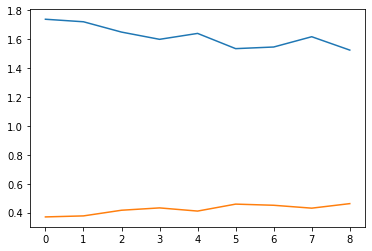

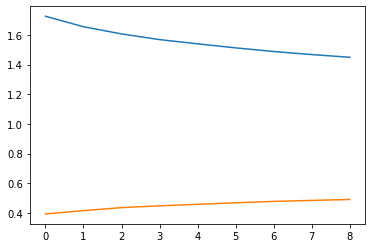

2022-06-20 08:51:48.477901: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: cif/assets


In [4]:
fh = mod_cif.fit(X_train, y_train, validation_split=0.1, epochs=10, verbose=0) # DO NOT USE TEST DATA
#can use batch_size=32 or sth like this to save on memory

plt.plot(fh.history['val_loss'][1:])
plt.plot(fh.history['val_sparse_categorical_accuracy'][1:])

plt.show()

plt.plot(fh.history['loss'][1:])
plt.plot(fh.history['sparse_categorical_accuracy'][1:])

plt.show()


# save: will create a directory of specified name
mod_cif.save('cif')

## Fit & Evaluate

[1.5108895301818848, 0.46700000762939453]


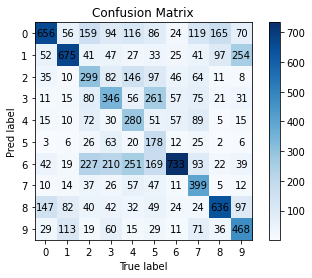

In [7]:
eval = mod_cif.evaluate(x=X_test, y=y_test, verbose=0)
print(eval)
yp = mod_cif.predict(X_test)
yp1 = np.argmax(yp, axis=1)
cm = confusion_matrix(yp1, y_test)
plot_cm(cm)

7 horse
[[0.05909942 0.01242577 0.09309766 0.26703933 0.04899205 0.0482283
  0.04947654 0.1922284  0.00252427 0.22688828]]
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


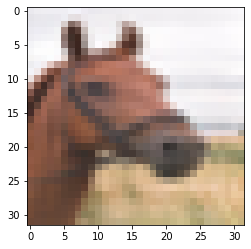

In [57]:
class_names
i=99
plt.imshow(X_test[i,:], cmap='Greys')
print(y_test[i,0], class_names[y_test[i,0] ])
print(mod_cif.predict(X_test[i:i+1,:,:,:]))
print(class_names)

## Report back and Discussion (15 min)

# CNN: A picture and some jargon

![CNN_convlayer](https://upload.wikimedia.org/wikipedia/commons/6/68/Conv_layer.png)
(from wikipedia.org)

### Filters

![filter](https://wiki.tum.de/download/attachments/23572254/cnn6.png)
(from wiki.tum.de)

- input layer: image shape [w,h,3]
- convolutional layer (Conv): filters

  - detect pattern (e.g. horizontal, vertical, diagonal lines)
  - have the same depth as input
  - several filter per layer: different filters applied to same spatial location in image

- pooling filter (Pool): spatially downsampling, depth stay the same (e.g. max or average)

Lower layers: Primitive concepts

Higher layers: Higher order concepts (reasoning on top of edge maps)


## CNN: tensorflow implementation

In [ ]:
nc = np.unique(y_train).size  # number of classes / labels in training set
l_name = 'sparse_categorical_crossentropy'
a_name = 'sparse_categorical_accuracy'

input_shape = X_train.shape[1:]

print('X_train.shape:     ', X_train.shape)
print('input_shape:       ', input_shape)
print('number of classes: ', nc)

model = tf.keras.models.Sequential(name='CNN')

# Convolutional layers
model.add(tf.keras.layers.InputLayer(input_shape))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='first_conv'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

#model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D((2, 2)))
#model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# as before
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu', name='last'))
model.add(tf.keras.layers.Dense(nc, activation='softmax', name='output'))

model.compile(optimizer='adam', loss=l_name, metrics=a_name)
model.summary()

## CNN: fitting and GPUs

The following cell will fit the model. This will take some time - especially without dedicated hardware (e.g. GPU) or further optimization (improved algorithm).


In [ ]:
fh = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

plt.plot(fh.history['loss'])
plt.plot(fh.history['val_loss'])
plt.show()

## Saving the model

In [ ]:
# Save the model. Choose suitable path and name. 
model.save('my_cifar10_model')

# Load the model (use latter)
model = tf.keras.models.load_model("my_cifar10_model")

## Evaluations

In [ ]:
eval = model.evaluate(X_test,  y_test)
print('evaluation ',eval)
test_acc = eval[1]

## Plotting history and test accuracy
plt.plot(fh.history['accuracy'], label='train accuracy')
plt.plot(fh.history['val_accuracy'], label = 'valid accuracy')
plt.axhline(y=test_acc, color='green', linestyle='-.',label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='upper left')
plt.show()

pred = model.predict(X_test)

y_pred = np.argmax(pred, axis=1)
cm=confusion_matrix(y_pred, y_test)
plot_cm(cm)

**Message:** A clear improvement over the previous network. Possibly some signs of overfitting.

**Discussion:** What could be further improvements?

## Predictions

**Task:** Explore some predictions on the test data

In [ ]:
idx=4
X = X_test[idx]
X = np.expand_dims(X, axis=0)

pred = model.predict(X)
i_max=np.argmax(pred)

plt.figure(figsize=(12,6))
ax = plt.subplot(2,2,1)
plt.imshow(X_test[idx]) 

ax = plt.subplot(2,2,2)
plt.bar(range(10), pred[0])
plt.title(class_names[i_max])
plt.show()